# Credit Card Fraud Detection using ML Algorithms

In [1]:
!pip install xgboost
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, neural_network

from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
# Time: Contains the seconds elapsed between each transaction and the first transaction in the dataset.
# Amount: The transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
# Class: Response variable. (1 for fraud and 0 for normal)

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Normal transactions: ' + str(sum(df.Class == 0)))
print('Frauds: ' + str(sum(df.Class == 1)))
print('Total transactions: ' + str(sum(df.Class == 1) + sum(df.Class == 0)))
print('Percentage of fraud out of all transactions: ' + str( float(sum(df.Class == 1)) / float(len(df.Class))*100.0))

Normal transactions: 284315
Frauds: 492
Total transactions: 284807
Percentage of fraud out of all transactions: 0.1727485630620034


In [7]:
# Class 0: Normal transaction
# Class 1: Fraud

pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Count of Normal transactions and Frauds'}, xlabel='Class', ylabel='Frequency'>

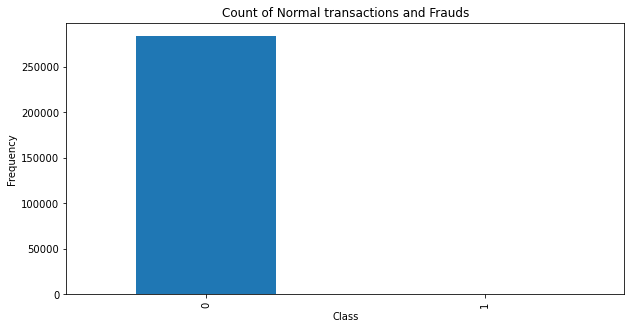

In [8]:
# Barplot of Fraud and normal transactions

plt.figure(figsize=(10,5))
plt.title('Count of Normal transactions and Frauds')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Class 0: Normal transaction
# Class 1: Fraud

pd.value_counts(df['Class'], sort=True).plot(kind='bar')

Text(0.5, 1.0, 'Amounts in Frauds (Euro)')

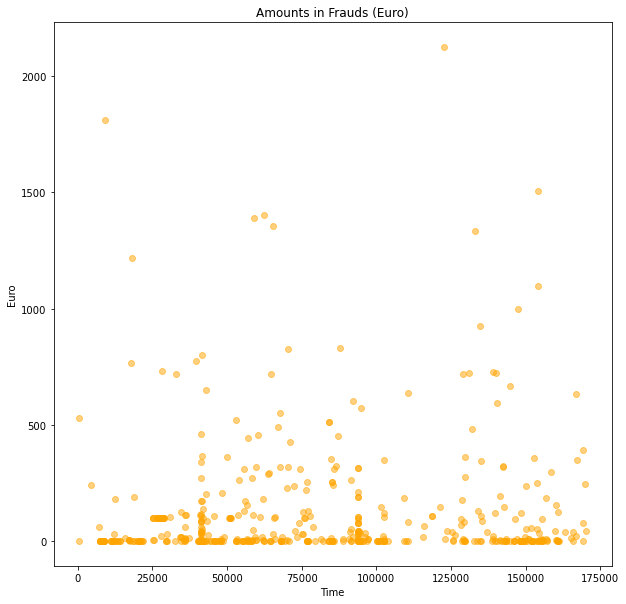

In [9]:
# Scatterplot of Fraud transactions

plt.figure(figsize=(10,10))
plt.scatter(df['Time'][df.Class==1], df['Amount'][df.Class==1], alpha=0.5, color='orange')

plt.xlabel('Time')
plt.ylabel('Euro')
plt.title('Amounts in Frauds (Euro)')  

Text(0, 0.5, 'Euro')

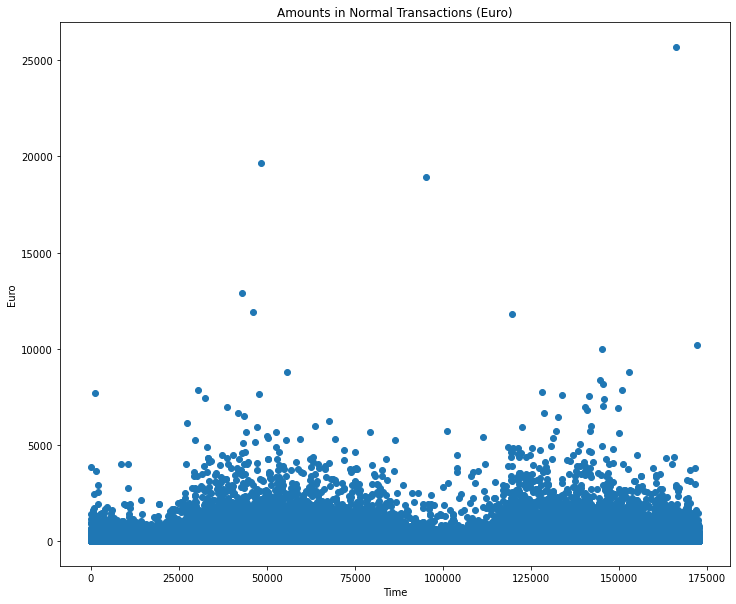

In [10]:
# Scatterplot of Normal transactions

plt.figure(figsize=(12,10))
plt.scatter(df['Time'][df.Class==0], df['Amount'][df.Class==0])

plt.title('Amounts in Normal Transactions (Euro)')
plt.xlabel('Time')
plt.ylabel('Euro')

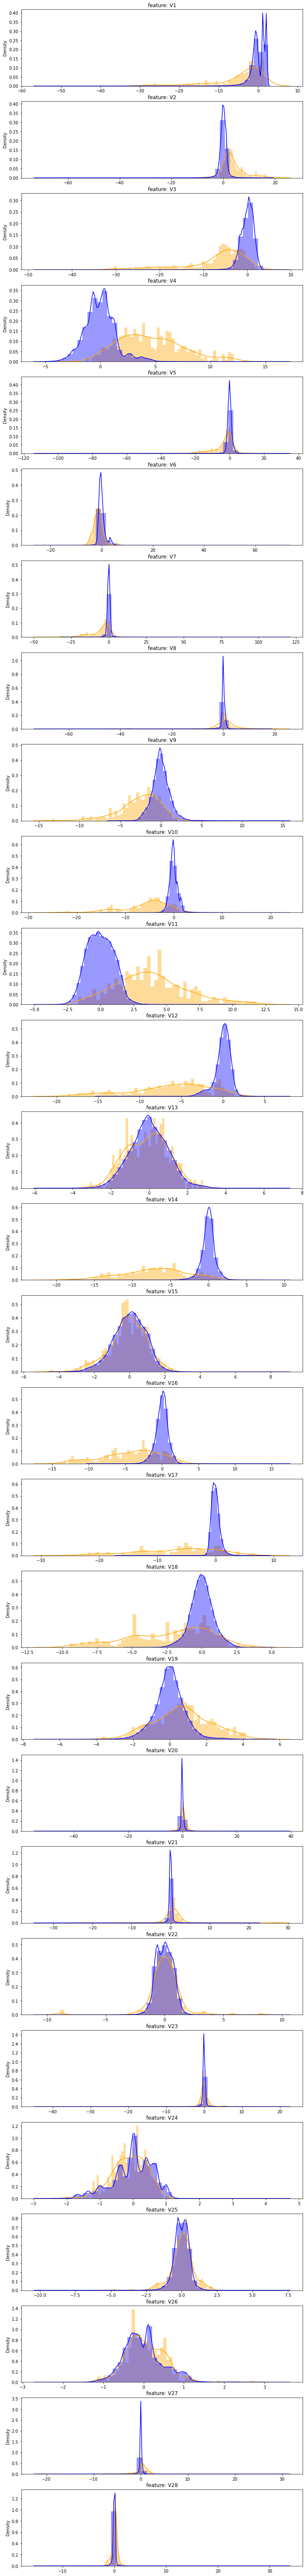

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Plot distributions of all features

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, col in enumerate(df[df.iloc[:, 1:29].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(df[col][df.Class == 1], bins=50, color='orange') #Fraud
   sns.distplot(df[col][df.Class == 0], bins=50, color='blue') #Normal
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(col))
plt.show()

#### Cleaning

In [12]:
# Drop similarly distributed features

df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,10.00,0


In [13]:
# Normalize 'Amount' feature

df['Amount_Stand'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Amount_Stand
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403


#### Resampling

In [14]:
X = df.drop('Class', axis=1)
y = df.Class

In [15]:
X_resample, y_resample = SMOTE().fit_resample(X, y)
print('Number of transactions after resampling : ' + str(len(X_resample)))
print('Fraud transactions = Normal transactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

Number of transactions after resampling : 568630
Fraud transactions = Normal transactions? True


<b>Machine Learning Algorithms</b>: Logistic regression, Naive Bayes, Decision tree, Random forest, Neural network (MLP) and XGBoost

In [16]:
# Split dataset into 80% training and 20% test set.

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)

In [17]:
MLAlgo = [
            linear_model.LogisticRegressionCV(),
            naive_bayes.GaussianNB(),
            tree.DecisionTreeClassifier(max_depth=3),
            ensemble.RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
            neural_network.MLPClassifier(alpha=1),
            xgb.XGBClassifier(n_estimators=500,eval_metric='auc', eta=0.1)
]

In [18]:
# Area under ROC curve (AUC) is used to evaluate the performance of the six models.

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLAlgo:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

,MLA Name,Precision,AUC
5,XGBClassifier,0.999457,0.999727
4,MLPClassifier,0.980750,0.964105
0,LogisticRegressionCV,0.971782,0.935844
2,DecisionTreeClassifier,0.955190,0.934655
3,RandomForestClassifier,0.988820,0.925434
1,GaussianNB,0.979312,0.915117


In [19]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [20]:
clf = xgb.XGBClassifier(n_estimators=500,
                        objective='binary:logistic',
                        eval_metric='auc',
                        eta=0.1,
                        max_depth=6,
                        subsample=1,
                        colsample_bytree=0.3,
                        silent=1)
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)])

[20:51:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-auc:0.98612
[1]	validation_0-auc:0.98832
[2]	validation_0-auc:0.99027
[3]	validation_0-auc:0.99028
[4]	validation_0-auc:0.99074
[5]	validation_0-auc:0.99146
[6]	validation_0-auc:0.99240
[7]	validation_0-auc:0.99271
[8]	validation_0-auc:0.99317
[9]	validation_0-auc:0.99331
[10]	validation_0-auc:0.99343
[11]	validation_0-auc:0.99451
[12]	validation_0-auc:0.99496
[13]	validation_0-auc:0.99528
[14]	validation_0-auc:0.99553
[15]	validation_0-auc:0.99565
[16]	validation_0-auc:0.99576
[17]	validation_0-auc:0.99605
[18]	validation_0-auc:0.99625
[19]	validation_0-auc:0.99632
[20]	validation_0-auc:0.99669
[21]	validation_0-auc:0.99697
[22]	validation_0-auc:0.99719
[23]	validation_0-auc:0.99725
[24]	validation_0-auc:0.99742
[25]	validation_0-auc:0.99750
[26]	validation_0-auc:0.99761
[27]

[262]	validation_0-auc:0.99998
[263]	validation_0-auc:0.99998
[264]	validation_0-auc:0.99998
[265]	validation_0-auc:0.99998
[266]	validation_0-auc:0.99998
[267]	validation_0-auc:0.99998
[268]	validation_0-auc:0.99998
[269]	validation_0-auc:0.99998
[270]	validation_0-auc:0.99998
[271]	validation_0-auc:0.99998
[272]	validation_0-auc:0.99998
[273]	validation_0-auc:0.99998
[274]	validation_0-auc:0.99998
[275]	validation_0-auc:0.99998
[276]	validation_0-auc:0.99998
[277]	validation_0-auc:0.99998
[278]	validation_0-auc:0.99998
[279]	validation_0-auc:0.99998
[280]	validation_0-auc:0.99998
[281]	validation_0-auc:0.99998
[282]	validation_0-auc:0.99998
[283]	validation_0-auc:0.99998
[284]	validation_0-auc:0.99998
[285]	validation_0-auc:0.99998
[286]	validation_0-auc:0.99998
[287]	validation_0-auc:0.99998
[288]	validation_0-auc:0.99998
[289]	validation_0-auc:0.99998
[290]	validation_0-auc:0.99998
[291]	validation_0-auc:0.99998
[292]	validation_0-auc:0.99998
[293]	validation_0-auc:0.99998
[294]	va

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [21]:
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)